In [ ]:
!pip install textblob


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [18]:
import re
from textblob import TextBlob


In [19]:
data = pd.read_csv("candidate.csv")
data = data.drop(['Unnamed: 0'], axis=1)

data.head()

,Tweets,len,ID,Date,Source,Likes,RT
0,NDA Government is honoured to have undertaken ...,140,1092709705909071872,2019-02-05 09:01:10,Twitter Web Client,14005,3223
1,"India is home to a dynamic middle class, which...",139,1092709704340402176,2019-02-05 09:01:09,Twitter Web Client,19746,4303
2,"Today, on #WorldCancerDay we reiterate our com...",139,1092355257496027136,2019-02-04 09:32:43,Twitter Web Client,13104,2508
3,Congratulated @DrKrishanMiddha Ji for the rema...,140,1092353308654620672,2019-02-04 09:24:58,Twitter Web Client,19282,3314
4,I salute all those who are valiantly fighting ...,140,1092352936825344000,2019-02-04 09:23:29,Twitter Web Client,28141,5306


In [20]:
fav_max = np.max(data['Likes'])
rt_max = np.max(data['RT'])
fav_min = np.min(data['Likes'])
fav = data[data.Likes == fav_max].index[0]
rt = data[data.RT == rt_max].index[0]
fav_tweet = data['Tweets'][fav]
rt_tweet = data['Tweets'][rt]
least_fav = data['Tweets'][fav_min]

In [21]:
print(f"The tweet with maximum likes is : \n{fav_tweet}")
print(f"Number of likes: {fav_max}")
print(f"\nThe tweet with more retweets is: \n{rt_tweet}")
print(f"Number of retweets: {rt_max}")
print(f"\nThe tweet with minimum likes is : \n{least_fav}")
print(f"Number of likes: {fav_min}")

The tweet with maximum likes is : 
Happy Republic Day to all fellow Indians. 

सभी देशवासियों को #गणतंत्रदिवस की शुभकामनाएं।

जय हिन्द!
Number of likes: 79420

The tweet with more retweets is: 
They got together in Kolkata with no agenda but to stop BJP.

They talk of democracy in a state where the ruling pa… https://t.co/LP1UbBxuJW
Number of retweets: 20230

The tweet with minimum likes is : 
NDA Government is honoured to have undertaken numerous steps for the wellbeing of the middle class. From a friendli… https://t.co/2cTfnoj8pE
Number of likes: 0


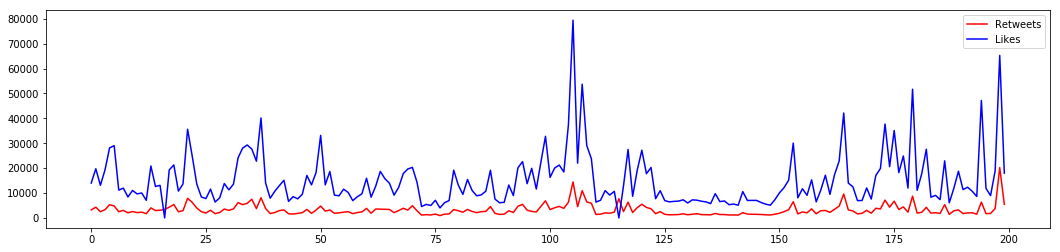

In [53]:
RT_t = pd.Series(data = data['RT'].values)
fav_t = pd.Series(data = data['Likes'].values)
RT_t.plot(figsize =(18,4),label="Retweets", color ='r',legend=True)
fav_t.plot(figsize=(18,4), label="Likes", color = 'b', legend=True)

In [102]:
# function to clean tweet and to perform sentiment analysis

def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ",tweet).split())
def analyze_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity >0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
data['SA'] = np.array([analyze_sentiment(tweet) for tweet in data["Tweets"]])
data['tidy tweet'] = np.array([clean_tweet(tweet) for tweet in data['Tweets']])
#data.head(40)

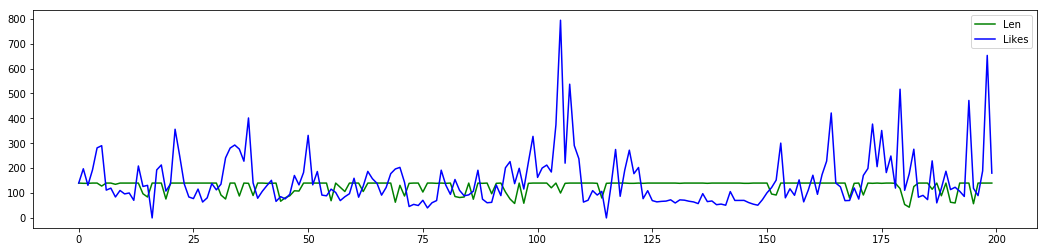

In [151]:
RT_t = pd.Series(data = data['len'])
fav_t = pd.Series(data = data['Likes']/100)
RT_t.plot(figsize =(18,4),label="Len", color ='g',legend=True)
fav_t.plot(figsize=(18,4), label="Likes", color = 'b', legend=True)

plt.savefig("images/len x likes.png")

In [114]:
data["Source"].value_counts()

Twitter Web Client      108
Twitter Media Studio     40
Twitter for iPhone       32
Periscope                19
Twitter for Android       1
Name: Source, dtype: int64

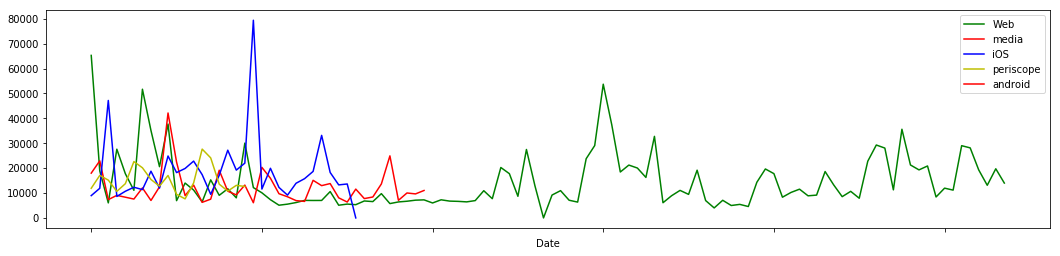

In [163]:
web_grouped = data[data["Source"] == "Twitter Web Client"].groupby([data["Date"]])
media_grouped = data[data["Source"] == "Twitter Media Studio"].groupby([data["Date"]])
iOS_grouped = data[data["Source"] == "Twitter for iPhone"].groupby([data["Date"]])
periscope_grouped = data[data["Source"] == "Periscope"].groupby([data["Date"]])
android_grouped = data[data["Source"] == "Twitter for Android"].groupby([data["Date"]])

web_grouped.head()

web = web_grouped['Likes'].sum()
web.plot(figsize =(18,4),label="Web", color ='g',legend=True)

media = media_grouped['Likes'].sum()
media.plot(figsize =(18,4),label="media", color ='r',legend=True)

iOS = iOS_grouped['Likes'].sum()
iOS.plot(figsize =(18,4),label="iOS", color ='b',legend=True)

periscope = periscope_grouped['Likes'].sum()
periscope.plot(figsize =(18,4),label="periscope", color ='y',legend=True)

android = android_grouped['Likes'].sum()
android.plot(figsize =(18,4),label="android", color ='r',legend=True)


plt.savefig("images/DateVsLikes.png")

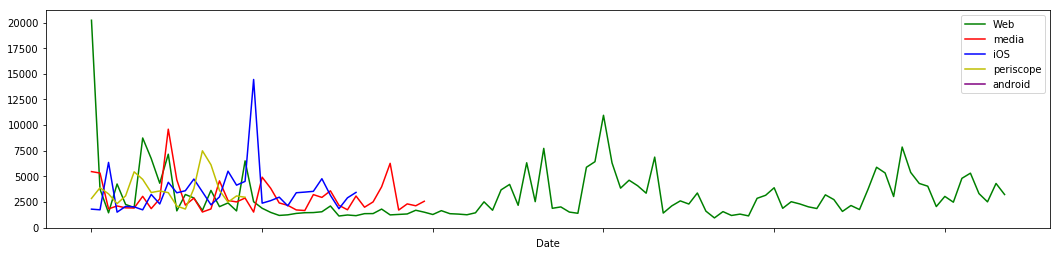

In [185]:
#Retuits and Tweets follow the some patterns

web = web_grouped['RT'].sum()
web.plot(figsize =(18,4),label="Web", color ='g',legend=True)

media = media_grouped['RT'].sum()
media.plot(figsize =(18,4),label="media", color ='r',legend=True)

iOS = iOS_grouped['RT'].sum()
iOS.plot(figsize =(18,4),label="iOS", color ='b',legend=True)

periscope = periscope_grouped['RT'].sum()
periscope.plot(figsize =(18,4),label="periscope", color ='y',legend=True)

android = android_grouped['RT'].sum()
android.plot(figsize =(18,4),label="android", color ='purple',legend=True)


plt.savefig("images/DateVsLikes.png")

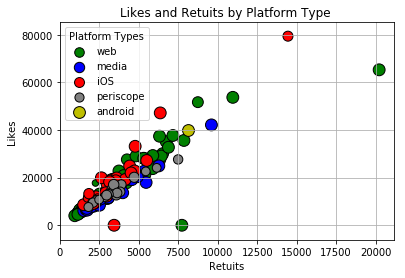

In [188]:
#iOS_grouped.head()

web_plot = plt.scatter(web_grouped["RT"].sum() , web_grouped["Likes"].sum() ,label='web', marker="o", 
                         facecolors="green", edgecolors= "black", 
                         s=web_grouped["len"].sum() , alpha=1
                           )

media_plot = plt.scatter(media_grouped["RT"].sum() , media_grouped["Likes"].sum() ,label='media', marker="o", 
                         facecolors="b", edgecolors= "black", 
                         s=media_grouped["len"].sum() , alpha=1
                        )
                       
iOS_plot = plt.scatter(iOS_grouped["RT"].sum() , iOS_grouped["Likes"].sum() ,label='iOS', marker="o", 
                         facecolors="r", edgecolors= "black", 
                         s=iOS_grouped["len"].sum() , alpha=1
                        )
                       
periscope_plot = plt.scatter(periscope_grouped["RT"].sum() , periscope_grouped["Likes"].sum() ,label='periscope', marker="o", 
                         facecolors="gray", edgecolors= "black", 
                         s=periscope_grouped["len"].sum() , alpha=1
                        )
                       
android_plot = plt.scatter(android_grouped["RT"].sum() , android_grouped["Likes"].sum() ,label='android', marker="o", 
                         facecolors="y", edgecolors= "black", 
                         s=android_grouped["len"].sum() , alpha=1
                          )

plt.grid(1)

plt.xlabel("Retuits")
plt.ylabel("Likes")

plt.legend(title= "Platform Types", loc="upper left")
plt.title("Likes and Retuits by Platform Type ")

plt.show()
plt.savefig("images/Bubble_plot.png")

In [195]:
#CREATING A TERMAL MAP TO SHOW PATTERNS AND TRENDS

import gmaps
import pandas as pd

# Configure gmaps
from config3 import gkey

gmaps.configure(api_key=gkey)


# Store latitude and longitude in locations
locations= data[["Likes","RT"]]

# Filla NaN values and convert to float
rating= data["len"].astype(float)



# Plot Heatmap
fig= gmaps.figure()

# Create heat layer
heat_layer= gmaps.heatmap_layer(locations, weights=rating, dissipating=False, 
                                max_intensity=10,point_radius=1)
fig.add_layer(heat_layer)
fig


InvalidPointException: 14005.0 is not a valid latitude. Latitudes must lie between -90 and 90.

In [82]:
data[['Day', 'Hour']] = data.Date.str.split(' ', expand = True)
data

data_grouped = data.groupby(["Day", "Hour"])
data_grouped.head()


# day = data['Day'].value_counts()
# hour = pd.Series(data = data['Hour'])

# plt.bar(data["Hour"],fav_t )

# plt.show()

,Tweets,len,ID,Date,Source,Likes,RT,SA,tidy tweet,Day,Hour
0,NDA Government is honoured to have undertaken ...,140,1092709705909071872,2019-02-05 09:01:10,Twitter Web Client,14005,3223,0,NDA Government is honoured to have undertaken ...,2019-02-05,09:01:10
1,"India is home to a dynamic middle class, which...",139,1092709704340402176,2019-02-05 09:01:09,Twitter Web Client,19746,4303,1,India is home to a dynamic middle class which ...,2019-02-05,09:01:09
2,"Today, on #WorldCancerDay we reiterate our com...",139,1092355257496027136,2019-02-04 09:32:43,Twitter Web Client,13104,2508,1,Today on WorldCancerDay we reiterate our commi...,2019-02-04,09:32:43
3,Congratulated @DrKrishanMiddha Ji for the rema...,140,1092353308654620672,2019-02-04 09:24:58,Twitter Web Client,19282,3314,1,Congratulated Ji for the remarkable win in Jin...,2019-02-04,09:24:58
4,I salute all those who are valiantly fighting ...,140,1092352936825344000,2019-02-04 09:23:29,Twitter Web Client,28141,5306,1,I salute all those who are valiantly fighting ...,2019-02-04,09:23:29
5,The iconic Dal Lake is mesmerising! \n\nHad th...,128,1092099890132516869,2019-02-03 16:37:58,Twitter Web Client,29022,4803,1,The iconic Dal Lake is mesmerising Had the opp...,2019-02-03,16:37:58
6,Had the wonderful opportunity of interacting w...,140,1092099517367939072,2019-02-03 16:36:29,Twitter Web Client,11171,2475,1,Had the wonderful opportunity of interacting w...,2019-02-03,16:36:29
7,The NDA Government has made sincere efforts to...,140,1092098681325654017,2019-02-03 16:33:10,Twitter Web Client,11959,3039,1,The NDA Government has made sincere efforts to...,2019-02-03,16:33:10
8,People from all walks of life came to bless th...,135,1092098334431559680,2019-02-03 16:31:47,Twitter Web Client,8412,2047,0,People from all walks of life came to bless th...,2019-02-03,16:31:47
9,Youth of Jammu and Kashmir want peace and deve...,140,1092097522904948739,2019-02-03 16:28:34,Twitter Media Studio,11027,2566,0,Youth of Jammu and Kashmir want peace and deve...,2019-02-03,16:28:34


In [24]:
positive =[]
negative =[]
neutral =[]
for value in data['SA']:
    if value >0:
        positive.append(data['Tweets'])
    elif value <0:
        negative.append(data['Tweets'])
    else:
        neutral.append(data['Tweets'])

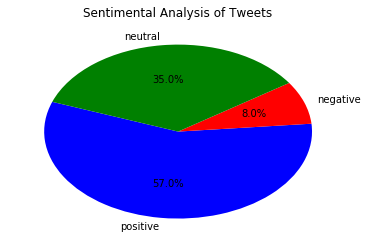

In [25]:
tweet_count =[len(positive),len(negative),len(neutral)]
labels = ["positive", "negative", "neutral"]
colors =['b','r','g']
plt.pie(tweet_count,labels=labels,colors=colors, autopct="%0.1f%%", startangle=160)
plt.title("Sentimental Analysis of Tweets")
plt.show()

In [ ]:

# Imports !
from flask import Flask, request, session, g, redirect, url_for, \
	abort, render_template, flash
from wtforms import Form, TextField, validators
import requests
import tweepy

# Configuration. Put in a seperate file later. 
DEBUG = "TRUE"

# Oauth connection to twitter
consumer_key=""
consumer_secret=""
access_token=""
access_token_secret=""
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# app.config.from_envvar('FLASK_SETTING', silent=True)

app = Flask(__name__)
app.config.from_object(__name__)

class TwitterForm(Form):
	twitterName = TextField('Twitter Name', [validators.Length(min=3, max=25)])

@app.route('/', methods=["GET","POST"])
def index():
	form = TwitterForm(request.form)
	if form != None:
		print form.twitterName
	return render_template('test.html')



if __name__ == '__main__':
	app.run(debug=True)